In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE

# Leer Dataset Diabetes
Fuente original de los datos: https://data.mendeley.com/datasets/wj9rwkp9c2/1

Los datos son una recopilacion de la sociedad iraquí, que se adquirieron del laboratorio del Hospital de la Ciudad Médica (Centro Especializado de Endocrinología y Diabetes-Hospital Docente Al-Kindy).

Se extrajeron datos de los pacientes para construir el conjunto de datos de diabetes. Los datos consisten en información médica, análisis de laboratorio.

El dataset contiene 1000 registros cada registro se encuentra clasificado en si tiene diabetes, no tiene diabetes o tiene Pre-Diabetes (se considera como positivo).

In [ ]:
url = 'https://drive.google.com/uc?export=csv&id=1z9wtzv457NGjZwPI-SpQsD1NTNWkq3AC'
dataset = pd.read_csv(url, delimiter=',')
print(dataset.shape)
dataset.head()

(1000, 14)


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Descripción de variables

| Variable | Descripción |
|-----|-----------|
| ID | Identificador del registro |
| No_Pation | Código de paciente  |
| Gender | Genero del paciente |
| AGE | Edad del paciente |
| Urea | Análisis de nitrógeno ureico en la sangre |
| Cr | Cociente de Creatinina |
| HbA1c | Nivel promedio de azúcar (glucosa) |
| Chol | Colesterol  |
| TG | Triglicéridos  |
| HDL | Lipoproteínas de alta densidad (colesterol bueno) |
| LDL | Lipoproteína de baja densidad (colesterol malo) |
| VLDL | Lipoproteína de muy baja densidad |
| BMI | Índice de Masa Corporal |
| CLASS | Diabético (Y), No Diabético (N) o Pre-Diabétis (P) |

In [ ]:
dataset.dtypes

,0
ID,int64
No_Pation,int64
Gender,object
AGE,int64
Urea,float64
Cr,int64
HbA1c,float64
Chol,float64
TG,float64
HDL,float64


# Eliminación del ID y código del paciente

In [ ]:
dataset.drop(['ID','No_Pation'], axis=1, inplace=True)
print(dataset.shape)
dataset.head()

(1000, 12)


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Reemplazar valores en las columnas Gender y CLASS

En Gender reemplazar:
* M -> 1
* F -> 0

In [ ]:
print(dataset['Gender'].value_counts())

Gender
M    565
F    434
f      1
Name: count, dtype: int64


In [ ]:
dataset['Gender'] = dataset['Gender'].str.strip().apply(lambda x: 1 if x.lower() == 'f' else 0)
print(dataset['Gender'].value_counts())
dataset.head()

Gender
0    565
1    435
Name: count, dtype: int64


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


En CLASS reemplazar:
*   Y -> 1
*   N -> 0
*   P -> 1 (Esto por que P indica que fue detectado con diabetes)




In [ ]:
print(dataset['CLASS'].value_counts())

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [ ]:
#Eliminccion de los pacientes con pre-diabetes para eliminar ruido
dataset = dataset[dataset['CLASS'] != 'P']

dataset['CLASS'] = dataset['CLASS'].str.strip().apply(lambda x: 1 if x.lower() == 'y' else 0)
print(dataset['CLASS'].value_counts())
dataset.head()

CLASS
1    844
0    103
Name: count, dtype: int64


<ipython-input-68-dc8b9bd3604c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CLASS'] = dataset['CLASS'].str.strip().apply(lambda x: 1 if x.lower() == 'y' else 0)


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


# Comprobando valores nulos

In [ ]:
dataset.isnull().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


# Eliminación de duplicados

In [ ]:
dataset.duplicated().sum()

161

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()
print(dataset.shape)

(786, 12)


<ipython-input-71-833da7abee97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(inplace=True)


# Análisis de datos

In [ ]:
dataset.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.445293,54.003817,5.217230,69.017812,8.444097,4.922290,2.412188,1.216094,2.601260,1.813613,29.731374,0.877863
std,0.497315,8.554135,3.110644,60.140936,2.613438,1.335687,1.471678,0.690342,1.144042,3.600160,4.926611,0.327653
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,0.000000,51.000000,3.670000,47.250000,6.800000,4.100000,1.500000,0.900000,1.700000,0.700000,26.000000,1.000000
50%,0.000000,55.000000,4.600000,59.000000,8.300000,4.800000,2.065000,1.100000,2.500000,1.000000,30.000000,1.000000
75%,1.000000,59.750000,5.800000,73.000000,10.300000,5.700000,3.000000,1.300000,3.300000,1.500000,33.000000,1.000000
max,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,1.000000


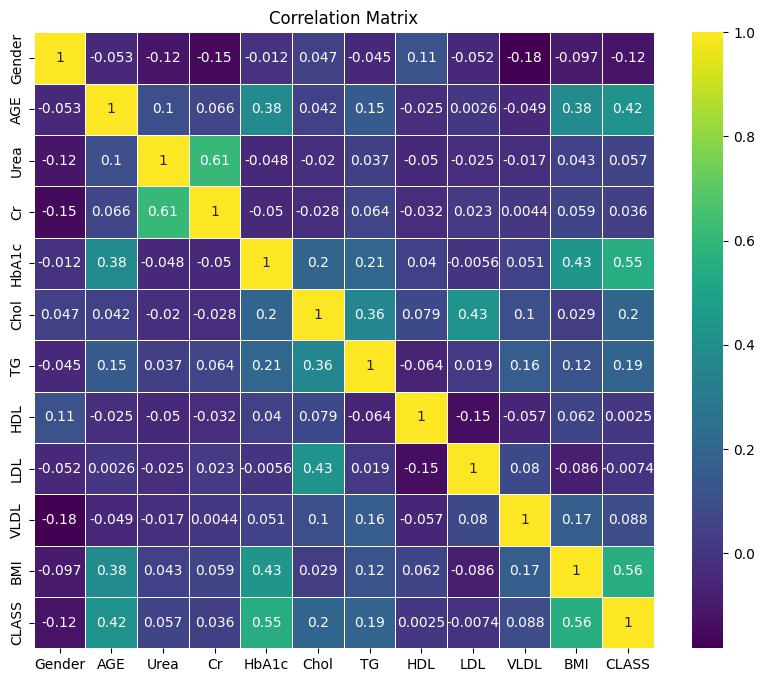

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

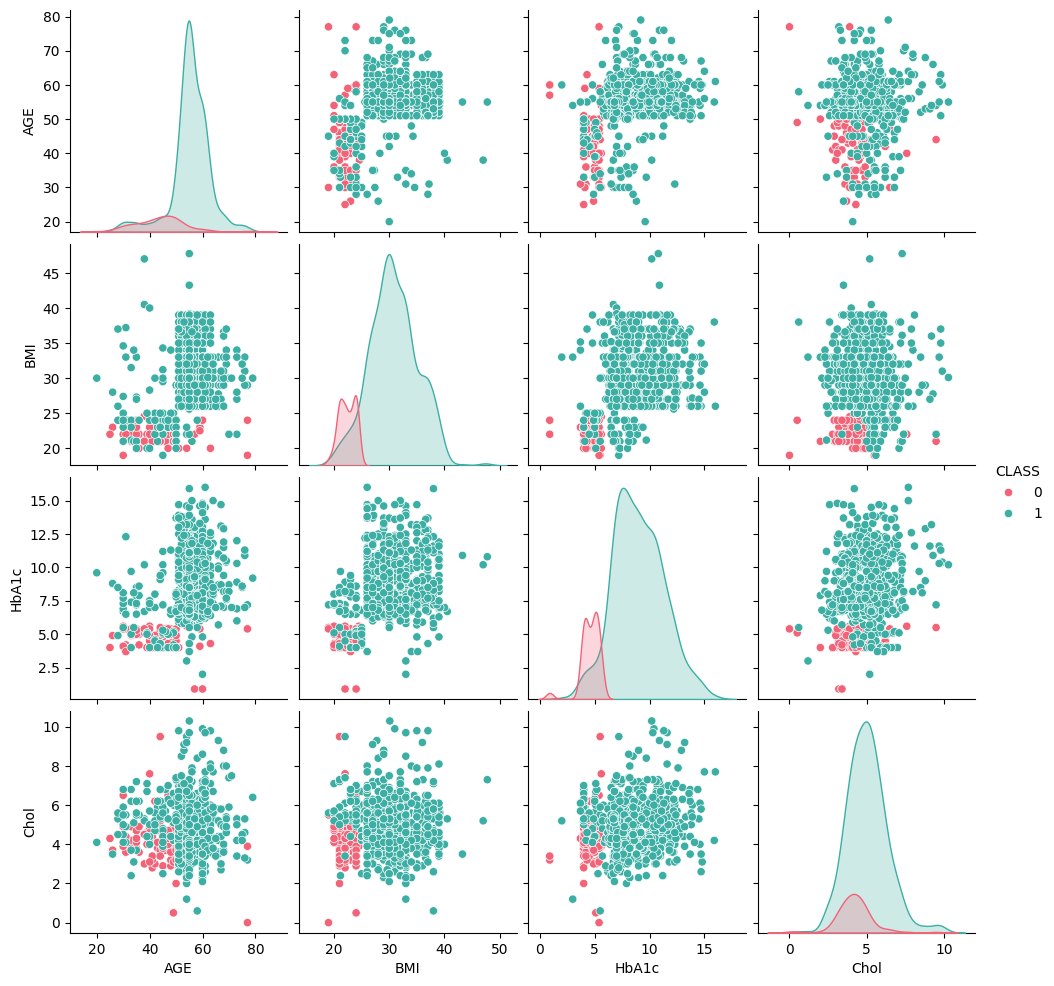

In [ ]:
sns.pairplot(dataset[['AGE', 'BMI', 'HbA1c', 'Chol', 'CLASS']], hue='CLASS', palette=['#f26378', '#3caea3'])
plt.show()

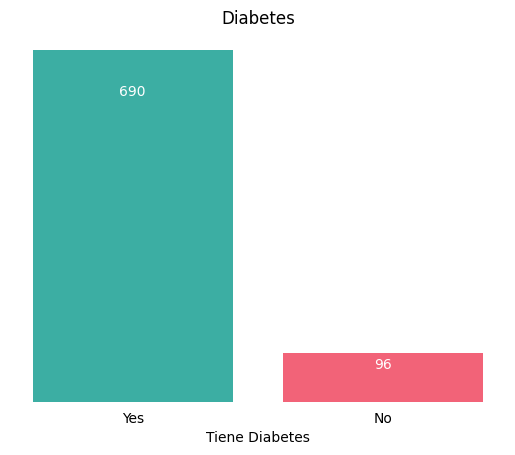

In [ ]:
colors = ['#3caea3', '#f26378']
hasDiabetes = dataset['CLASS'].value_counts()
hasDiabetes.index = ['Yes', 'No']

plt.bar(hasDiabetes.index, hasDiabetes.values, align='center', color=colors)
plt.title('Diabetes')
plt.xlabel('Tiene Diabetes')
plt.ylabel('')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom='on')
plt.box(False)

for i, v in enumerate (hasDiabetes.values):
    plt.text(hasDiabetes.index[i], v -(v * 0.1), str(v), ha='center', va='top', color='white')

plt.show()

# Eliminar outliers usando z-score

In [ ]:
columns = ['Gender','AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
z = np.abs(stats.zscore(dataset[columns]))
dataset = dataset[(z<3).all(axis=1)]
dataset.shape

(704, 12)

# Re-escalado de datos

In [ ]:
scaler = StandardScaler()
dataset.loc[:, columns] = scaler.fit_transform(dataset[columns])
dataset.head()

<ipython-input-77-1ff7771b0f7c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.05852819 -0.94470795  1.05852819  1.05852819 -0.94470795 -0.94470795
  1.05852819  1.05852819  1.05852819  1.05852819  1.05852819  1.05852819
 -0.94470795  1.05852819  1.05852819  1.05852819  1.05852819  1.05852819
 -0.94470795  1.05852819  1.05852819 -0.94470795 -0.94470795 -0.94470795
  1.05852819  1.05852819 -0.94470795 -0.94470795  1.05852819  1.05852819
  1.05852819 -0.94470795 -0.94470795  1.05852819  1.05852819 -0.94470795
  1.05852819 -0.94470795 -0.94470795  1.05852819 -0.94470795  1.05852819
 -0.94470795  1.05852819  1.05852819  1.05852819  1.05852819  1.05852819
  1.05852819  1.05852819  1.05852819 -0.94470795 -0.94470795 -0.94470795
  1.05852819 -0.94470795  1.05852819  1.05852819 -0.94470795  1.05852819
 -0.94470795 -0.94470795  1.05852819  1.05852819  1.05852819 -0.94470795
 -0.94470795  1.05852819  1.05852819  1.0585

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1.058528,-0.529622,-0.118791,-0.638783,-1.334564,-0.558887,-1.142213,3.034936,-1.125935,-0.588287,-1.149276,0
4,-0.944708,-2.638242,1.028713,-0.638783,-1.334564,0.030246,-1.060217,-0.887806,-0.552342,-0.672687,-1.779526,0
5,1.058528,-1.149804,-1.266296,-1.484161,-1.677604,-1.652990,-1.060217,-0.397463,-1.030336,-0.672687,-1.779526,0
6,1.058528,-0.529622,-1.409734,-0.485077,-1.677604,-1.063857,-0.814229,-0.642635,-0.456743,-0.503886,-1.149276,0
7,-0.944708,-0.777695,-0.118791,-0.600356,-1.677604,-1.652990,-1.224209,-0.642635,-0.934737,-0.672687,-1.149276,0


#Visualización de la reducción de dimensionalidad usando t-SNE


In [ ]:
tsne = TSNE(n_components=2)
tsneResult = tsne.fit_transform(dataset.drop('CLASS', axis=1))

yResult = dataset['CLASS']
minableDataset = pd.DataFrame(tsneResult)
minableDataset['CLASS'] = yResult.reset_index(drop=True)
minableDataset.head()

,0,1,CLASS
0,-28.728405,16.832890,0
1,-17.113594,-20.352329,0
2,-31.433676,-16.156885,0
3,-30.028263,-15.204588,0
4,-12.438768,-24.255629,0


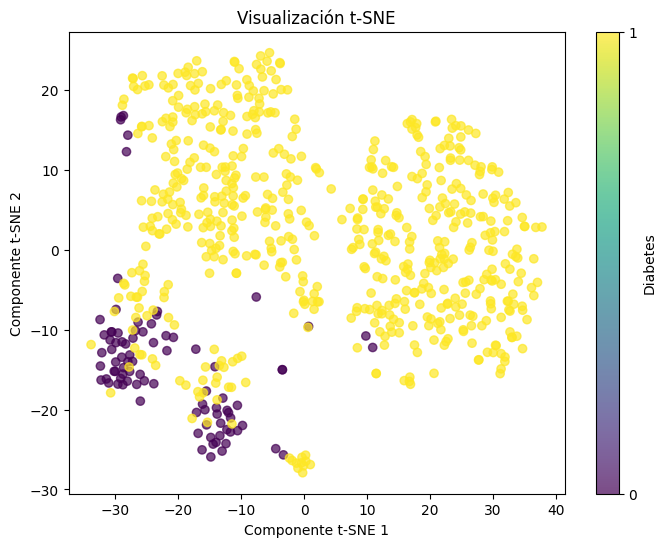

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsneResult[:, 0], tsneResult[:, 1], c=dataset['CLASS'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], label='Diabetes')
plt.title('Visualización t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()

# Visualización de la reducción de dimensionalidad usando PCA

In [ ]:
yResult = dataset['CLASS']

pca = PCA(n_components=2)
pcaResult = pca.fit_transform(dataset.drop('CLASS', axis=1))

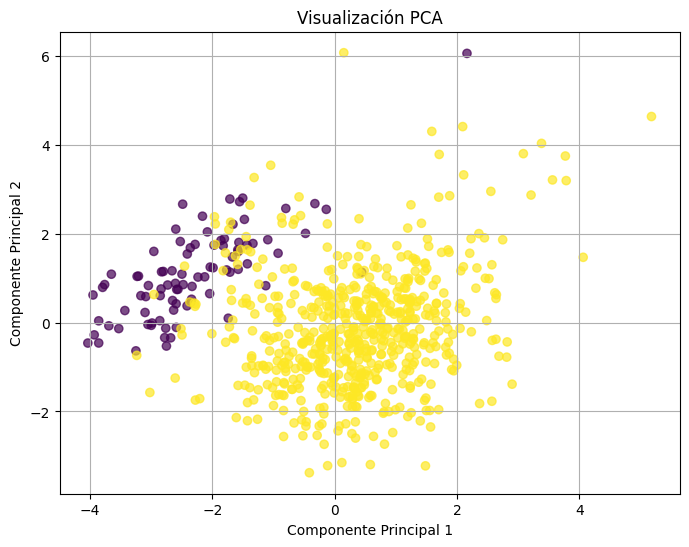

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pcaResult[:, 0], pcaResult[:, 1], c=yResult, cmap='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA')
plt.grid()
plt.show()

Tras revisar las gráficas obtenidas de PCA y t-SNE, se decidió optar por la redimensionalidad mediante t-SNE.

Con lo cual se obtubo la tabla minable para dividirlo para entrenamiento, validacion y testing.

In [ ]:
minableDataset = pd.DataFrame(tsneResult)
minableDataset['CLASS'] = yResult.reset_index(drop=True)
minableDataset.head()

,0,1,CLASS
0,-28.728405,16.832890,0
1,-17.113594,-20.352329,0
2,-31.433676,-16.156885,0
3,-30.028263,-15.204588,0
4,-12.438768,-24.255629,0


# Dividir el Dataset (Train, validation, testing)


*   **Train:** Conjunto de datos para entrenar el modelo (70%).
*   **Validation:** Conjunto de datos para clasificar la precisión del modelo (20%).
*   **Testing:** Conjunto de datos para evaluar el modelo final (10%).

In [ ]:
datasetTrain, datasetTemp = train_test_split(minableDataset, test_size=0.30, random_state=42)
datasetValidation, datasetTesting = train_test_split(datasetTemp, test_size=1/3, random_state=42)
print('Dataset Train shape', datasetTrain.shape)
print('Dataset Validation shape', datasetValidation.shape)
print('Dataset Testing shape', datasetTesting.shape)

Dataset Train shape (492, 3)
Dataset Validation shape (141, 3)
Dataset Testing shape (71, 3)


# Método para generar el informe de clasificación y matriz de confusión

In [ ]:
def classReport(modelTitle, yValues, prediction):
  classReport = classification_report(yValues, prediction)
  print(modelTitle)
  print(classReport)

  confusionMatrix = confusion_matrix(yValues, prediction)
  sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Valores Predichos')
  plt.ylabel('Valores Verdaderos')
  plt.title('Matriz de Confusión')
  plt.show()

In [ ]:
validationData = datasetValidation.drop('CLASS', axis=1)

# Entrenamiento y validación del modelo KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(datasetTrain.drop('CLASS', axis=1), datasetTrain['CLASS'])

KNeighborsClassifier(n_neighbors=3, weights='distance')

Knn
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       0.95      0.99      0.97       117

    accuracy                           0.95       141
   macro avg       0.95      0.87      0.90       141
weighted avg       0.95      0.95      0.95       141



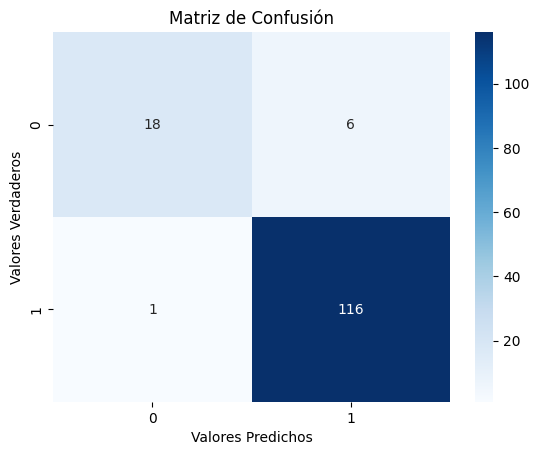

In [ ]:
classReport('Knn', datasetValidation['CLASS'], knn.predict(validationData))

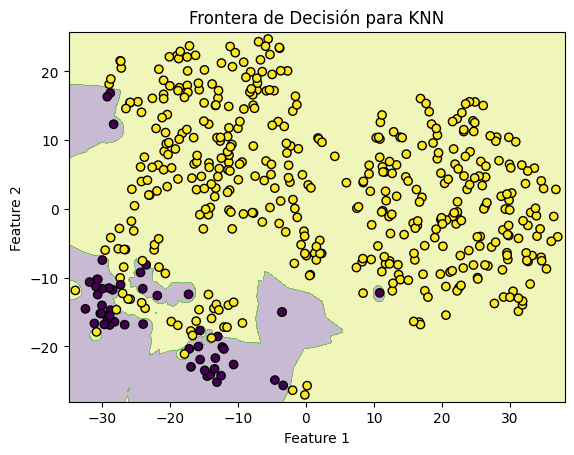

In [ ]:
X = datasetTrain.drop('CLASS', axis=1)

xMin, xMax = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
yMin, yMax = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
gridX, gridY = np.meshgrid(np.arange(xMin, xMax , 0.01), np.arange(yMin, yMax, 0.01))

Z = knn.predict(np.c_[gridX.ravel(), gridY.ravel()])
Z = Z.reshape(gridX.shape)

plt.contourf(gridX, gridY, Z, alpha=0.3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=datasetTrain['CLASS'], edgecolor='k', marker='o')
plt.title('Frontera de Decisión para KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Entrenamiento y validación del modelo Random Forest

In [ ]:
randomForest = RandomForestClassifier(n_estimators=200, class_weight='balanced')
randomForest.fit(datasetTrain.drop('CLASS', axis=1), datasetTrain['CLASS'])

RandomForestClassifier(class_weight='balanced', n_estimators=200)

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.58      0.72        24
           1       0.92      0.99      0.95       117

    accuracy                           0.92       141
   macro avg       0.93      0.79      0.84       141
weighted avg       0.92      0.92      0.91       141



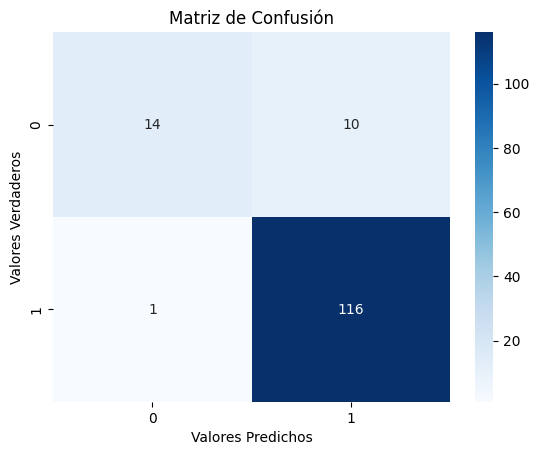

In [ ]:
classReport('Random Forest', datasetValidation['CLASS'], randomForest.predict(validationData))

# Entrenamiento y validación del modelo Árbol de desiciones


In [ ]:
decisionTree = DecisionTreeClassifier(class_weight='balanced')
decisionTree.fit(datasetTrain.drop('CLASS', axis=1), datasetTrain['CLASS'])

DecisionTreeClassifier(class_weight='balanced')

Árbol de desiciones
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.92      0.97      0.94       117

    accuracy                           0.90       141
   macro avg       0.85      0.77      0.80       141
weighted avg       0.89      0.90      0.89       141



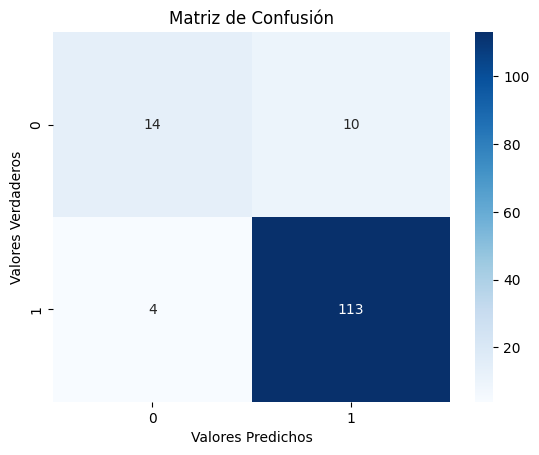

In [ ]:
classReport('Árbol de desiciones', datasetValidation['CLASS'], decisionTree.predict(validationData))

# Testing del modelo seleccionado
Tras revisar los resultados obtenidos con los 3 modelos se decidio optar por el modelo KNN el cual nos devolvio un accuracy de 95%

Knn
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.95      0.95      0.95        60

    accuracy                           0.92        71
   macro avg       0.84      0.84      0.84        71
weighted avg       0.92      0.92      0.92        71



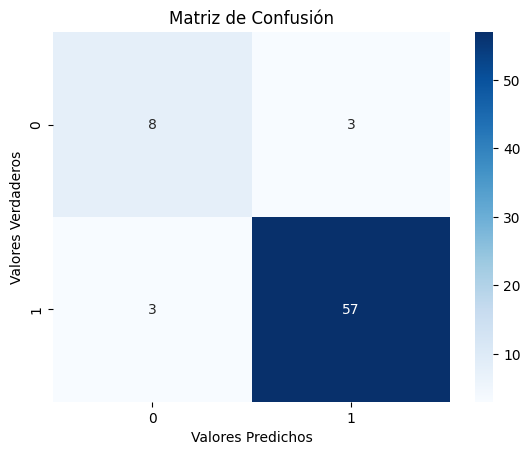

In [ ]:
testingData = datasetTesting.drop('CLASS', axis=1)
classReport('Knn', datasetTesting['CLASS'], knn.predict(testingData))